In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
from numpy.linalg import norm

In [2]:
df = pd.read_csv('ANLSYS2/STROMAL/2ACT_ordr_T.csv',index_col = 0)

In [3]:
df.head()

,time,iter,type,v_x,v_y,v_z,x,y,z,n_cells
0,0,1,GM,-106.745366,-15.036011,98.757152,[-269.97857143 37.89285714 -269.42857143],[-270.54676259 37.84892086 -268.73381295],[-269.26119403 36.99253731 -267.7761194 ],1360
1,1,1,GM,-9.494521,38.894032,152.379761,[-123.40540541 148.10810811 -8.68243243],[-122.67123288 151.84931507 -7.00684932],[-123.02797203 155.95104895 -6.74825175],1360
2,2,1,GM,-22.868325,-36.906295,19.588557,[ -76.94482759 -47.32413793 -102.85517241],[ -72.96598639 -45.63945578 -104.6462585 ],[ -68.69127517 -47.46308725 -108.09395973],1360
3,3,1,GM,55.357647,-123.018522,-27.025048,[-57.88888889 2.63888889 -24.20833333],[-60.31724138 2.86896552 -21.33103448],[-61.68309859 0.50704225 -16.78873239],1360
4,4,1,GM,344.998152,-159.620231,208.295582,[-185.1037037 88.8962963 -60.37037037],[-184.88188976 87.92125984 -60.33070866],[-184.6796875 86.453125 -59.8125 ],1360


In [4]:
df['order'] = df[['v_x','v_y','v_z']].apply(lambda x:norm(np.array([x[0],x[1],x[2]])),axis = 1)
#df['order'] = df[['x','y','z']].apply(lambda x,y,z:norm(x,y,z))
df['order'] = df.order/df.n_cells

In [5]:
df.head()

,time,iter,type,v_x,v_y,v_z,x,y,z,n_cells,order
0,0,1,GM,-106.745366,-15.036011,98.757152,[-269.97857143 37.89285714 -269.42857143],[-270.54676259 37.84892086 -268.73381295],[-269.26119403 36.99253731 -267.7761194 ],1360,0.107498
1,1,1,GM,-9.494521,38.894032,152.379761,[-123.40540541 148.10810811 -8.68243243],[-122.67123288 151.84931507 -7.00684932],[-123.02797203 155.95104895 -6.74825175],1360,0.115847
2,2,1,GM,-22.868325,-36.906295,19.588557,[ -76.94482759 -47.32413793 -102.85517241],[ -72.96598639 -45.63945578 -104.6462585 ],[ -68.69127517 -47.46308725 -108.09395973],1360,0.035023
3,3,1,GM,55.357647,-123.018522,-27.025048,[-57.88888889 2.63888889 -24.20833333],[-60.31724138 2.86896552 -21.33103448],[-61.68309859 0.50704225 -16.78873239],1360,0.101162
4,4,1,GM,344.998152,-159.620231,208.295582,[-185.1037037 88.8962963 -60.37037037],[-184.88188976 87.92125984 -60.33070866],[-184.6796875 86.453125 -59.8125 ],1360,0.318722


In [6]:
ordr = ['ER','BA','BA-cl','WS','GM','NO FRC']
df = df.replace('OF','NO FRC')
df = df.replace('PW','BA-cl')

In [7]:
print(df.type.unique())

['GM' 'BA' 'BA-cl' 'ER' 'WS' 'NO FRC']


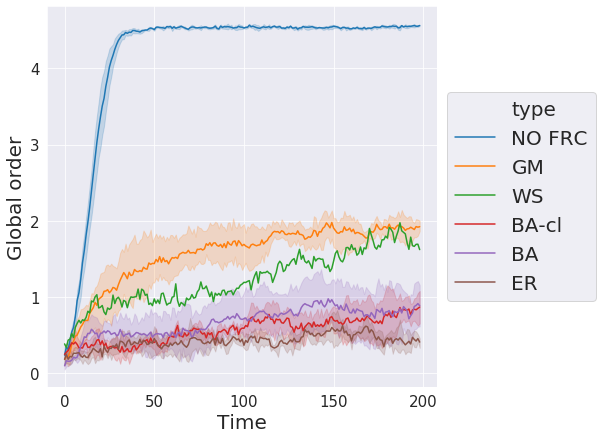

In [8]:
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
plt.figure(figsize = (7,7))
sns.lineplot(x = 'time',y = 'order',data = df,hue = 'type',hue_order = ordr[::-1])
plt.ylabel('Global order',fontsize = 20)
plt.xlabel('Time',fontsize = 20)
plt.legend(fontsize = 20,loc='center left', bbox_to_anchor=(1, 0.5))

In [15]:
graph_types = df.type.unique()
std_rows = []
for t in range(197):
    df_at_t = df[df.time == t]
    for gt in graph_types:
        angles = df_at_t[df_at_t.type == gt].order
        std_rows.append([t,gt,np.std(angles)])

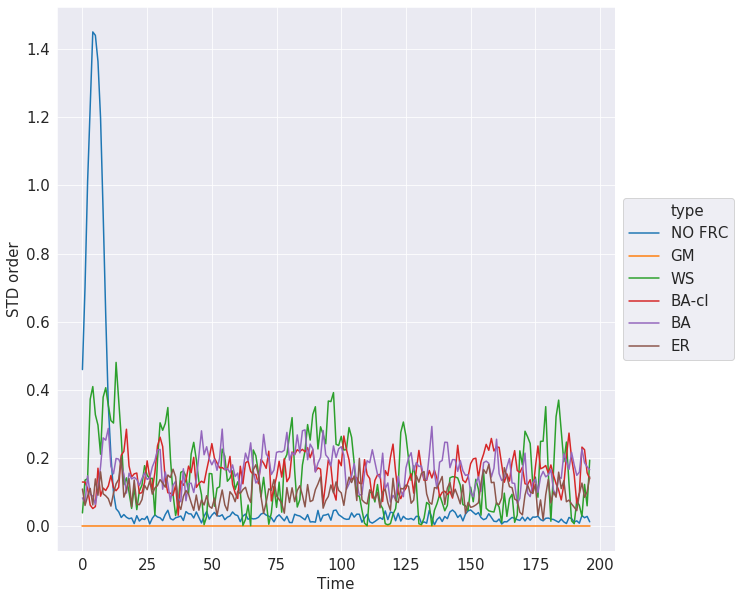

In [18]:
std_df = pd.DataFrame(data = std_rows,columns = ['time','type','std'])
plt.figure(figsize = (10,10))
sns.lineplot(x = 'time',y = 'std',data = std_df,hue = 'type',hue_order = ordr[::-1])
plt.ylabel('STD order',fontsize = 15)
plt.xlabel('Time',fontsize = 15)
plt.legend(fontsize = 15,loc='center left', bbox_to_anchor=(1, 0.5))

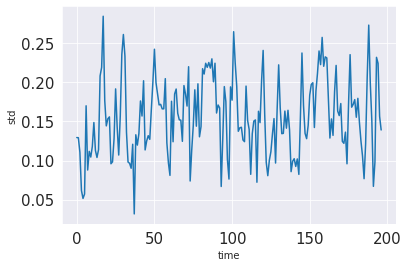

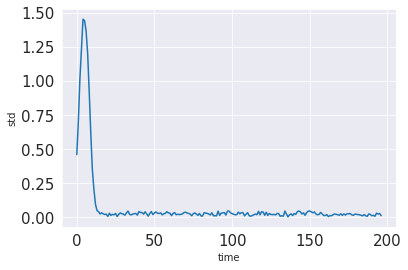

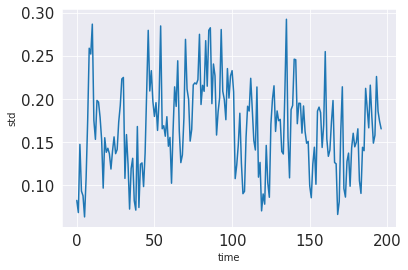

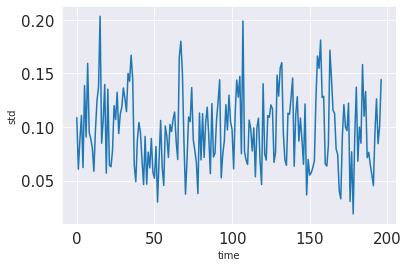

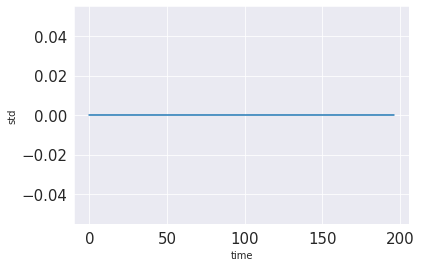

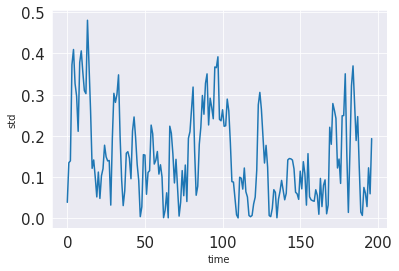

In [17]:
for gt in std_df.type.unique():
    sns.lineplot(x = 'time', y = 'std',data = std_df[std_df.type == gt])
    plt.show()

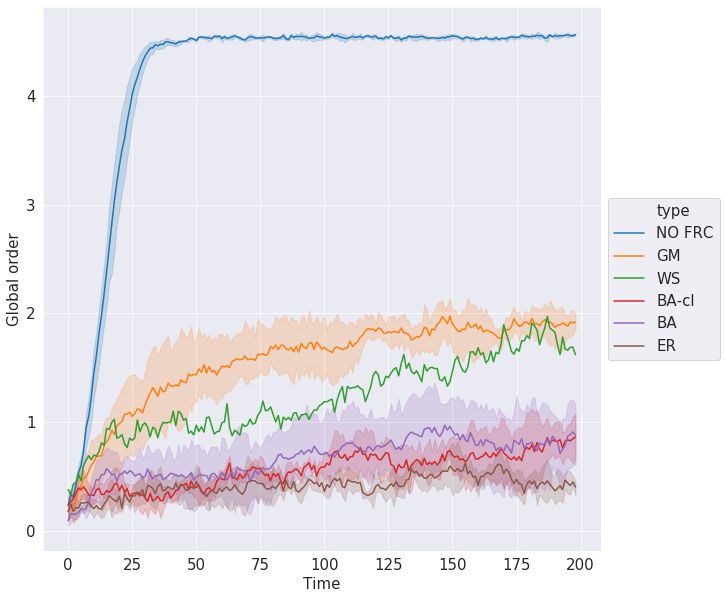

In [19]:
df = pd.read_csv('ANLSYS2/STROMAL/2ACT_ordr_T.csv',index_col = 0)

df['order'] = df[['v_x','v_y','v_z']].apply(lambda x:norm(np.array([x[0],x[1],x[2]])),axis = 1)
df['order'] = df.order/df.n_cells

df = df.replace('OF','NO FRC')
df = df.replace('PW','BA-cl')

plt.figure(figsize = (10,10))
sns.lineplot(x = 'time',y = 'order',data = df,hue = 'type',hue_order = ordr[::-1])
plt.ylabel('Global order',fontsize = 15)
plt.xlabel('Time',fontsize = 15)
plt.legend(fontsize = 15,loc='center left', bbox_to_anchor=(1, 0.5))



In [20]:
graph_types = df.type.unique()
std_rows = []
for t in range(197):
    df_at_t = df[df.time == t]
    for gt in graph_types:
        angles = df_at_t[df_at_t.type == gt].order
        std_rows.append([t,gt,np.std(angles)])

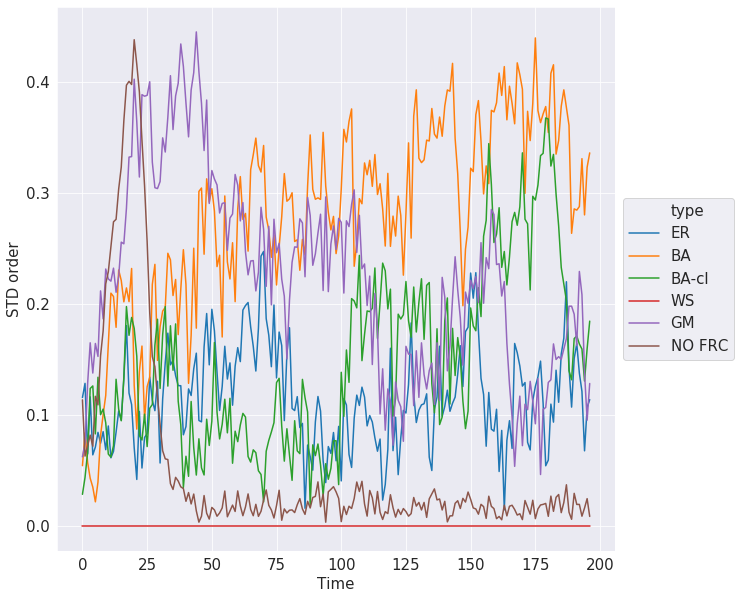

In [21]:
std_df = pd.DataFrame(data = std_rows,columns = ['time','type','std'])
plt.figure(figsize = (10,10))
sns.lineplot(x = 'time',y = 'std',data = std_df,hue = 'type',hue_order = ordr)
plt.ylabel('STD order',fontsize = 15)
plt.xlabel('Time',fontsize = 15)
plt.legend(fontsize = 15,loc='center left', bbox_to_anchor=(1, 0.5))